<a href="https://colab.research.google.com/github/habibur-rahman-swe/DeepLearningWithKeras/blob/main/DeepLearningWithKeras_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the necessary libraries
import datetime, warnings, scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor='dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# import the functions from keras and sklearn libraries
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

In [16]:
df = pd.read_csv('/content/sample_data/AirQuality.csv', sep=';', decimal=',')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [19]:
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [24]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')

In [25]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


In [27]:
df = df.drop(columns=['Date', 'Time'])

In [28]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


In [30]:
df = df.set_index('Datetime')

KeyError: "None of ['Datetime'] are in the columns"

In [31]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [33]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [41]:
def calculate_quantile(i, df):
  Q1 = df[[i]].quantile(0.25)[0]
  Q3 = df[[i]].quantile(0.75)[0]
  IQR = Q3 - Q1
  min = df[[i]].min()[0]
  max = df[[i]].max()[0]
  min_IQR = Q1 - 1.5 * IQR
  max_IQR = Q3 + 1.5 * IQR

  return Q1, Q3, min, max, min_IQR, max_IQR

for i in df.columns:
  print('\nAttribute- ', i, ':')
  Q1, Q3, min, max, min_IQR, max_IQR = calculate_quantile(i, df)
  print('Q1 = %.2f' % Q1)
  print('Q3 = %.2f' % Q3)
  print('min IQR = %.2f' % min_IQR)
  print('max IQR = %.2f' % max_IQR)
  if (min < min_IQR):
    print('---> low outlier is found = %.2f' % min)
  if (max > max_IQR):
    print('---> High outlier is found = %.2f' % max)

  def convert_nan (x, max_IQR = max_IQR, min_IQR=min_IQR):
    if ((x > max_IQR) | (x < min_IQR)):
      x = np.nan
    else:
      x = x
    return x

  def convert_nan_HUM (x, max_IQR=100.0, min_IQR=min_IQR):
    if ((x > max_IQR) | (x < min_IQR)):
      x = np.nan
    else:
      x = x
    return x

  if (i == 'HUM'):
    df[i] = df[i].map(convert_nan_HUM)
    df[i] = df[i].interpolate(metthod='linear')

  if (i != 'HUM'):
    df[i] = df[i].map(convert_nan)
    df[i] = df[i].interpolate(method='linear')

  if (len(df[df[i].isnull()][i]) == 0):
    print('##### Outliners have been interpolated ####')


Attribute-  CO(GT) :
Q1 = 1.10
Q3 = 2.90
min IQR = -1.60
max IQR = 5.60
##### Outliners have been interpolated ####

Attribute-  PT08.S1(CO) :
Q1 = 939.00
Q3 = 1236.00
min IQR = 493.50
max IQR = 1681.50
##### Outliners have been interpolated ####

Attribute-  NMHC(GT) :
Q1 = -200.00
Q3 = -200.00
min IQR = -200.00
max IQR = -200.00

Attribute-  C6H6(GT) :
Q1 = 4.50
Q3 = 14.00
min IQR = -9.75
max IQR = 28.25
##### Outliners have been interpolated ####

Attribute-  PT08.S2(NMHC) :
Q1 = 739.00
Q3 = 1117.00
min IQR = 172.00
max IQR = 1684.00
---> High outlier is found = 1696.00
##### Outliners have been interpolated ####

Attribute-  NOx(GT) :
Q1 = 51.00
Q3 = 279.00
min IQR = -291.00
max IQR = 621.00
---> High outlier is found = 635.00
##### Outliners have been interpolated ####

Attribute-  PT08.S3(NOx) :
Q1 = 654.00
Q3 = 964.00
min IQR = 189.00
max IQR = 1429.00
---> High outlier is found = 1442.00
##### Outliners have been interpolated ####

Attribute-  NO2(GT) :
Q1 = 76.00
Q3 = 138.00


In [ ]:
16.13

In [43]:
dataset = np.log1p(df[['T']].values)
dataset.shape

(9471, 1)

<Figure size 1200x500 with 0 Axes>

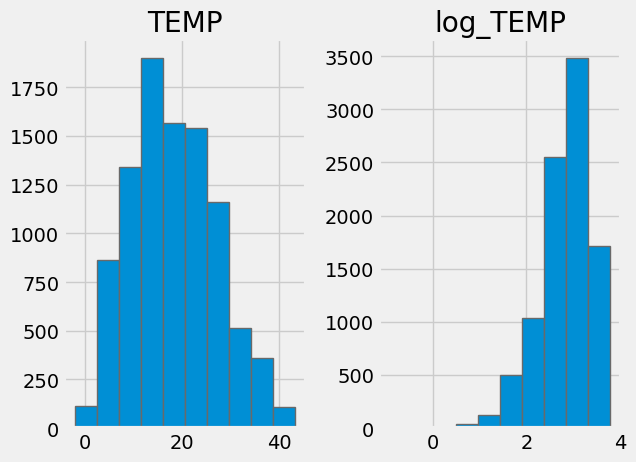

In [44]:
# create new dataframe to compare the original vs log transform data
dist_df = pd.DataFrame({'TEMP' : df['T'].values, 'log_TEMP' : dataset[:, 0]})

# histogram plot original vs log transform data
plt.figure(figsize=(12, 5))
dist_df.hist();

In [45]:
# split the dataset into train and test sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

7103 2368


In [50]:
# converst an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []

  for i in range(len(dataset) - look_back - 1):
    a = dataset[i:(i + look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

# reshape the train and test data
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print('Shape of trainX: ', trainX.shape)
print('Shape of trainY: ', trainY.shape)
print('Shape of testX: ', testX.shape)
print('Shape of testY: ', testY.shape)

Shape of trainX:  (7101, 1)
Shape of trainY:  (7101,)
Shape of testX:  (2366, 1)
Shape of testY:  (2366,)


In [51]:
# reshape the input array in the form - [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print('Shape of trainX : ', trainX.shape)
print('Shape of testX : ', testX.shape)

Shape of trainX :  (7101, 1, 1)
Shape of testX :  (2366, 1, 1)


In [58]:
# create and fit the lstm neural network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
222/222 - 3s - loss: 5.2020 - 3s/epoch - 13ms/step
Epoch 2/50
222/222 - 0s - loss: 1.6065 - 437ms/epoch - 2ms/step
Epoch 3/50
222/222 - 0s - loss: 0.2335 - 444ms/epoch - 2ms/step
Epoch 4/50
222/222 - 0s - loss: 0.0698 - 419ms/epoch - 2ms/step
Epoch 5/50
222/222 - 0s - loss: 0.0639 - 450ms/epoch - 2ms/step
Epoch 6/50
222/222 - 0s - loss: 0.0594 - 409ms/epoch - 2ms/step
Epoch 7/50
222/222 - 0s - loss: 0.0546 - 436ms/epoch - 2ms/step
Epoch 8/50
222/222 - 0s - loss: 0.0495 - 455ms/epoch - 2ms/step
Epoch 9/50
222/222 - 0s - loss: 0.0439 - 431ms/epoch - 2ms/step
Epoch 10/50
222/222 - 1s - loss: 0.0377 - 568ms/epoch - 3ms/step
Epoch 11/50
222/222 - 1s - loss: 0.0306 - 584ms/epoch - 3ms/step
Epoch 12/50
222/222 - 1s - loss: 0.0230 - 583ms/epoch - 3ms/step
Epoch 13/50
222/222 - 1s - loss: 0.0162 - 694ms/epoch - 3ms/step
Epoch 14/50
222/222 - 0s - loss: 0.0117 - 481ms/epoch - 2ms/step
Epoch 15/50
222/222 - 0s - loss: 0.0091 - 441ms/epoch - 2ms/step
Epoch 16/50
222/222 - 0s - loss: 0.0

In [62]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = np.expm1(trainPredict)
trainY = np.expm1(trainY)
testPredict = np.expm1(testPredict)
testY = np.expm1(testY)
testY
# Calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY, testPredict[:, 0]))
# print('Test Score: %.2f RMSE' % (testScore))


74/74 [==============================] - 0s 1ms/step


array([inf, inf, inf, ..., inf, inf, inf])